In [3]:
# Downloading our library 
!git clone git@github.com:hzi-bifo/seminar-dlmb-2024-winter-public.git

Cloning into 'seminar-dlmb-2024-winter-public'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 27 (delta 2), reused 27 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 1.83 MiB | 3.19 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [11]:
%pip install biopython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 11.8 MB/s eta 0:00:0031m12.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 12.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 12.0 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 11.7 MB/s eta 0:00:0031m12.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
import sys
sys.path.append('seminar-dlmb-2024-winter-public/src/')
# from utility.file_utility import FileUtility
from amr.amr_utility import load_gene_data, create_gene_datasets

# Creating our dataset
create_gene_datasets("seminar-dlmb-2024-winter-public/", "seminar-dlmb-2024-winter-public/data/ds1")

# Loading the AMR prediction data
ds = load_gene_data("seminar-dlmb-2024-winter-public/data/ds1", "Klebsiella_pneumoniae_aztreonam", "gyrA")

seq_train = [x[1] for x in ds["train"]]
y_train = [x[2] for x in ds["train"]]

seq_test = [x[1] for x in ds["test"]]
y_test = [x[2] for x in ds["test"]]


Klebsiella_pneumoniae_aztreonam
rpsL 135 135 15 15
ompK35 135 135 15 15
acrR 135 135 15 15
ompK37 135 135 15 15
parC 135 135 15 15
gyrA 135 135 15 15
gyrB 135 135 15 15
ompK36 135 135 15 15
Staphylococcus_aureus_cefoxitin
ileS 135 135 15 15
dfrB 135 135 15 15
fusA 135 135 15 15
pbp2 135 135 15 15
pbp4 135 135 15 15
grlB 135 135 15 15
rpoB 135 135 15 15
grlA 135 135 15 15
gyrA 135 135 15 15
pbp4-promoter 135 135 15 15


In [13]:
print('Num of samples in train data: {}'.format(len(seq_train)))
print('Num of samples in test data: {}'.format(len(seq_test)))


Num of samples in train data: 135
Num of samples in test data: 15


In [14]:
print('Input of the first element:\n{}'.format(seq_train[0]))
print('First label: {} -> resistant'.format(y_train[0]))

Input of the first element:
tggcacgaaaaaccaaacaacaggcacgtgaaacccggcaactgattctggatgttgctctgcgtctgttttcgcagcaaggcgtatcatctacctcgttggcaacaattgcaaaagctgcgggtgtaacgaggggggctatctactggcatttcaagaataaatcagatttattcaacgaaatttgggagctgtcagacgccagtattagcgatctcgaaattgagtatcgggcaaaattccccaacgatccactctcagttatcagggagattctagtctatgttcttgaagcgacagtgacagaagaacgtcgacgattaatgatggagattatctatcataagtgtgagttcgtcggtgaaatgaccgtggtgcagcaggcccagcggcagctctccctggcgagttatgagcgtatcgagcagaccttgaaagagtgcatcgcggcgaagctgctgcccgccaatttactcacccggcgggcggccgtgttaatgcgcagctacctttccgggctgatggaaaactggctgtttgcccccgattcgttcgacctgcatgcggaagcgcgggactacgtcgctattctgctggagatgtatcaattctgcccgacgctacgcggcccggagagcttgtcagcttaaa
First label: 1 -> resistant


In [15]:
import seaborn as sns
import numpy as np

Median and mean sequence length: 651.0, 650.8222222222222


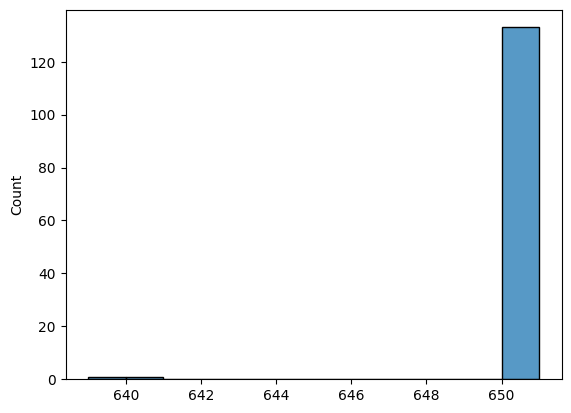

In [17]:
len_train = [len(s) for s in seq_train]
sns.histplot(len_train, binwidth=1)
median = np.median(len_train)
mean = np.mean(len_train)
print('Median and mean sequence length: {}, {}'.format(median, mean))

In [19]:
uniq_vals = set(y_train)
y_train_int = list(map(int, y_train))
print('Labels in training data')
print('Non resistant: {}'.format(y_train_int.count(0)))
print('Resistant: {}'.format(y_train_int.count(1)))

Labels in training data
Non resistant: 11
Resistant: 124


In [20]:
uniq_vals = set(y_test)
y_test_int = list(map(int, y_test))
print('Labels in test data')
print('Non resistant: {}'.format(y_test_int.count(0)))
print('Resistant: {}'.format(y_test_int.count(1)))

Labels in test data
Non resistant: 4
Resistant: 11
